In [1]:
!pip install scipy

In [2]:
!pip install researchpy

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import seaborn as sns

import researchpy as rp
from scipy import stats

In [106]:
bike_df=pd.read_csv('02/demos/datasets/day.csv')

In [5]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike_df.shape

(731, 16)

In [110]:
bike_sharing_data_df=bike_df[['season', 'mnth', 'holiday',
       'workingday', 'weathersit', 'temp', 'cnt']]

In [9]:
bike_sharing_data_df.shape

(731, 7)

In [10]:
bike_sharing_data_df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [11]:
bike_sharing_data_df['season'].unique()

array([1, 2, 3, 4])

In [12]:
bike_sharing_data_df['workingday'].unique()

array([0, 1])

In [13]:
bike_sharing_data_df['holiday'].unique()

array([0, 1])

In [14]:
bike_sharing_data_df['weathersit'].unique()

array([2, 1, 3])

In [15]:
bike_sharing_data_df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [16]:
bike_sharing_data_df.dtypes

season          int64
mnth            int64
holiday         int64
workingday      int64
weathersit      int64
temp          float64
cnt             int64
dtype: object

In [17]:
bike_sharing_data_df.groupby(by='workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


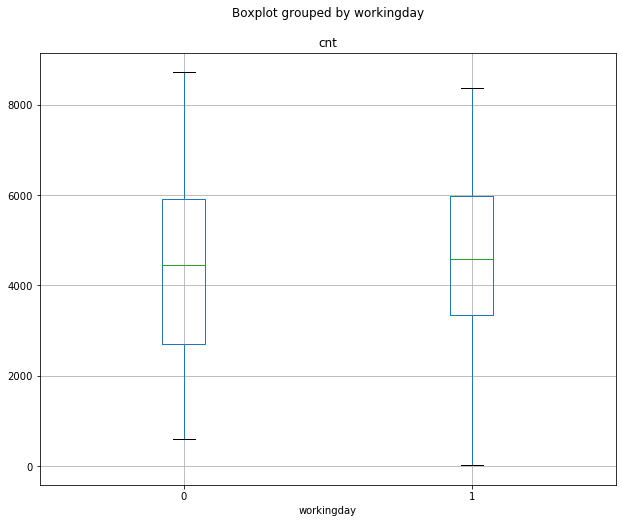

In [18]:
bike_sharing_data_df.boxplot(column='cnt',by='workingday',figsize=(10,8))

In [19]:
sample_01=bike_sharing_data_df[bike_sharing_data_df.workingday == 0]

In [20]:
sample_02=bike_sharing_data_df[bike_sharing_data_df.workingday == 1]

In [21]:
sample_01.reset_index(inplace=True,drop=True);sample_02.reset_index(inplace=True,drop=True)

In [22]:
sample_01.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,0,2,0.165000,959
3,1,1,0,0,1,0.138333,822
4,1,1,0,0,2,0.233333,1248


In [23]:
sample_02.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,1,1,0.196364,1349
1,1,1,0,1,1,0.200000,1562
2,1,1,0,1,1,0.226957,1600
3,1,1,0,1,1,0.204348,1606
4,1,1,0,1,2,0.196522,1510


In [24]:
sample_01.shape,sample_02.shape

((231, 7), (500, 7))

#### for T test both the samples should be same, so random sample from sample_02 and there should be two groups.. As data is divided into groups we need categorical variables. ie., T-test need categorical variable for hypothesis testing

In [25]:
sample_02=sample_02.sample(231)

In [26]:
sample_01.shape,sample_02.shape

((231, 7), (231, 7))

# Assumptions of Independent T-Test
#### 1) Sample of both groups are of same number
#### 2) Both the groups are having same variance
#### 2) Distribution betwenn two groups is normal distribution

#### Checking if both groups are having same variance
##### If p-value > 5% accept Ho else accept the alternate hypothesis

In [27]:
stats.levene(sample_01['cnt'],sample_02['cnt'])

LeveneResult(statistic=1.7946324149485133, pvalue=0.18102421084508608)

###### As p-value is 36% we are accepting Ho

#### Checking if distribution between two groups is normal

In [28]:
diff = scale(np.array(sample_01['cnt'],dtype=np.float) - np.array(sample_02['cnt']))

(array([12., 13., 26., 29., 38., 39., 37., 21., 12.,  4.]),
 array([-2.22954632, -1.76810541, -1.30666449, -0.84522358, -0.38378266,
         0.07765826,  0.53909917,  1.00054009,  1.461981  ,  1.92342192,
         2.38486284]),
 <a list of 10 Patch objects>)

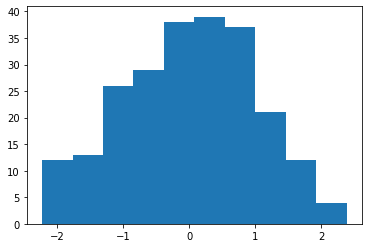

In [29]:
plt.hist(diff)

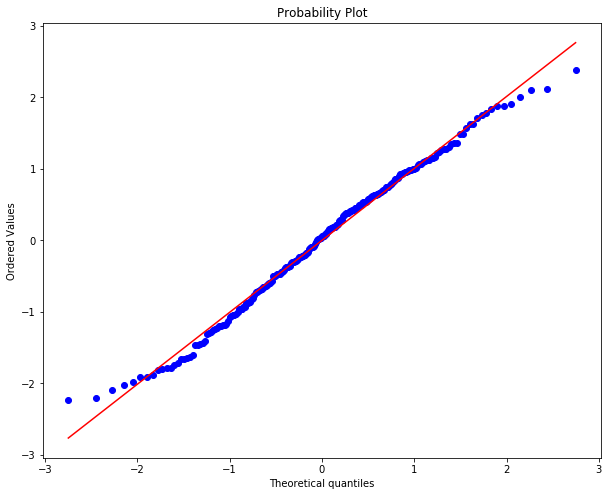

In [148]:
plt.subplots(figsize=(10,8))
stats.probplot(diff,plot=plt,dist='norm')
plt.show()

In [31]:
stats.shapiro(diff)

(0.9900012016296387, 0.11150870472192764)

In [32]:
stats.ttest_ind(sample_02['cnt'],sample_01['cnt'])

Ttest_indResult(statistic=1.045134464632503, pvalue=0.29650971760230316)

In [33]:
descriptiveness,result =rp.ttest(sample_01['cnt'],sample_02['cnt'])

In [34]:
descriptiveness

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
1,cnt,231.0,4523.588745,1923.647561,126.566717,4274.210320,4772.967169
2,combined,462.0,4426.878788,1989.131442,92.542770,4245.020842,4608.736734


In [35]:
result

,Independent t-test,results
0,Difference (cnt - cnt) =,-193.4199
1,Degrees of freedom =,460.0000
2,t =,-1.0451
3,Two side test p value =,0.2965
4,Difference < 0 p value =,0.1483
5,Difference > 0 p value =,0.8517
6,Cohen's d =,-0.0972
7,Hedge's g =,-0.0971
8,Glass's delta =,-0.0943
9,r =,0.0487


#### as pvalue is 61 % Reject Ha and accept Ho

In [36]:
bike_sharing_data_df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe03674d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe03674dcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe03674d320>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe036762390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0367626d8>],
 'means': []}

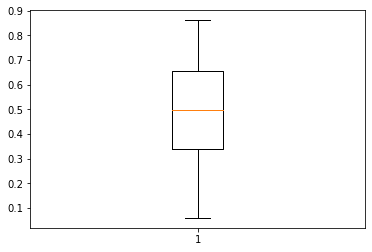

In [108]:
plt.boxplot(bike_sharing_data_df['temp'])

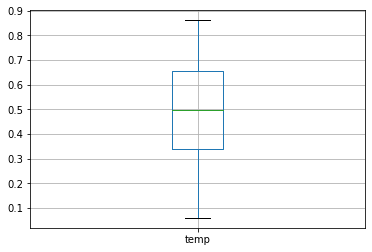

In [43]:
bike_sharing_data_df[['temp']].boxplot()

In [118]:
bike_sharing_data_df['temp_cat']=bike_sharing_data_df.loc[:,'temp']>bike_sharing_data_df.loc[:,'temp'].mean()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
bike_sharing_data_df.sample(5)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_cat
263,3,9,0,1,2,0.595000,4352,True
486,2,5,0,1,2,0.613333,5740,True
197,3,7,0,0,1,0.719167,5302,True
360,1,12,0,1,2,0.325000,1162,False
70,1,3,0,0,1,0.329167,2132,False


In [120]:
bike_sharing_data_df.groupby(by='temp_cat')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_cat,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


In [121]:
sample_11=bike_sharing_data_df[bike_sharing_data_df['temp_cat']==True]

In [122]:
sample_12=bike_sharing_data_df[bike_sharing_data_df['temp_cat']==False]

In [123]:
sample_11.reset_index(inplace=True);sample_12.reset_index(inplace=True)

In [124]:
sample_11.shape,sample_12.shape

((367, 9), (364, 9))

In [125]:
sample_11=sample_11.sample(364)

In [138]:
stats.levene(sample_11['cnt'],sample_12['cnt'])

LeveneResult(statistic=5.319701585221233, pvalue=0.021366362144784816)

In [164]:
diff_temp=scale(np.array(sample_11['cnt'])-np.array(sample_12['cnt']))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


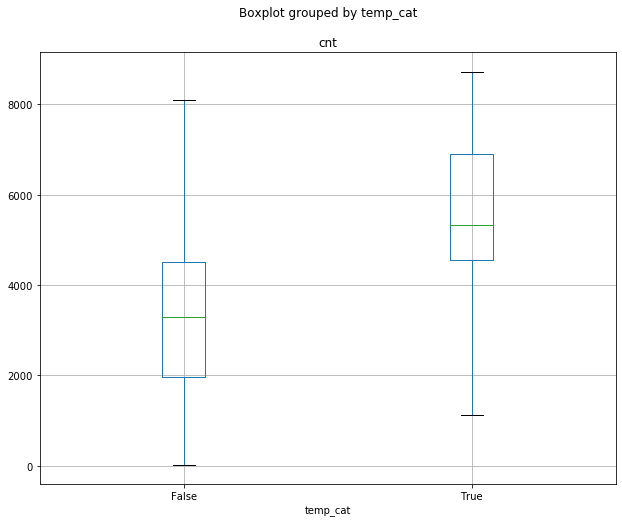

In [165]:
bike_sharing_data_df.boxplot(column='cnt',by='temp_cat',figsize=(10,8))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 3., 14., 33., 51., 77., 85., 60., 25.,  7.,  6.]),
 array([-2.8624052 , -2.28445983, -1.70651445, -1.12856908, -0.5506237 ,
         0.02732167,  0.60526705,  1.18321242,  1.7611578 ,  2.33910317,
         2.91704855]),
 <a list of 10 Patch objects>)

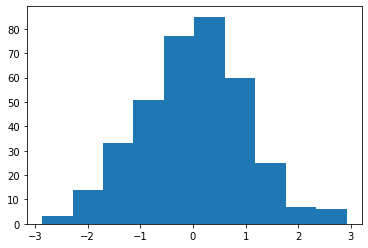

In [141]:
plt.hist(diff_temp)

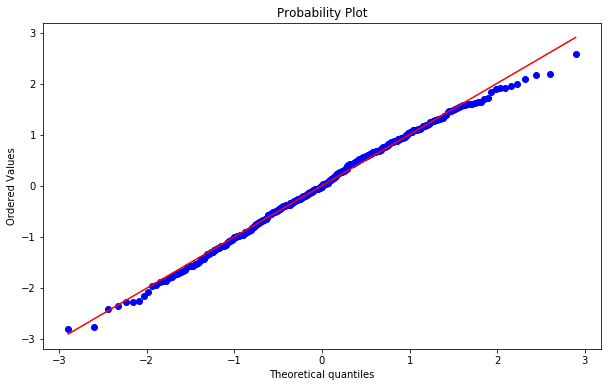

In [168]:
plt.figure(figsize=(10,6))
stats.probplot(diff_temp,plot=plt,dist='norm')
plt.show()

In [169]:
stats.shapiro(diff_temp)

(0.9948469996452332, 0.26478832960128784)

In [170]:
stats.ttest_ind(sample_11['cnt'],sample_12['cnt'])

Ttest_indResult(statistic=18.899254004434727, pvalue=4.3094856037305885e-65)

In [178]:
descript,result=rp.ttest(sample_11['cnt'],sample_12['cnt'])

In [182]:
result

,Independent t-test,results
0,Difference (cnt - cnt) =,2218.0769
1,Degrees of freedom =,726.0000
2,t =,18.8993
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4009
7,Hedge's g =,1.3995
8,Glass's delta =,1.5116
9,r =,0.5742


In [180]:
descript1,result1=rp.ttest(sample_11['cnt'],sample_12['cnt'],equal_variances=False)

In [183]:
result1

,Welch's t-test,results
0,Difference (cnt - cnt) =,2218.0769
1,Degrees of freedom =,711.8265
2,t =,18.8993
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4009
7,Hedge's g =,1.3995
8,Glass's delta =,1.5116
9,r =,0.5780


In [184]:
bp_df=pd.read_csv('02/demos/datasets/blood_pressure.csv')

In [185]:
bp_df.shape

(120, 5)

In [186]:
bp_df.columns

Index(['patient', 'sex', 'agegrp', 'bp_before', 'bp_after'], dtype='object')

In [187]:
bp_df.sample(5)

,patient,sex,agegrp,bp_before,bp_after
16,17,Male,30-45,141,162
56,57,Male,60+,147,176
46,47,Male,60+,172,169
116,117,Female,60+,161,152
49,50,Male,60+,170,163


In [191]:
bp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


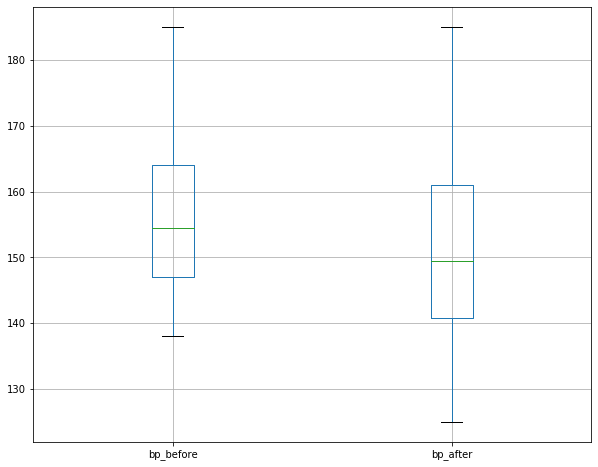

In [195]:
bp_df.boxplot(['bp_before','bp_after'],figsize=(10,8))

In [196]:
stats.levene(bp_df['bp_before'],bp_df['bp_after']) 

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [199]:
bp_df['bp_diff']=scale(np.array(bp_df['bp_before'])-np.array(bp_df['bp_after'],dtype=float))

In [201]:
bp_df.sample(10)

,patient,sex,agegrp,bp_before,bp_after,bp_diff
32,33,Male,46-59,167,175,-0.786578
102,103,Female,60+,147,149,-0.426084
50,51,Male,60+,175,146,1.436469
82,83,Female,46-59,150,138,0.415069
117,118,Female,60+,165,174,-0.846661
74,75,Female,30-45,147,147,-0.305919
87,88,Female,46-59,157,136,0.955810
19,20,Male,30-45,162,150,0.415069
80,81,Female,46-59,157,127,1.496552
15,16,Male,30-45,152,126,1.256222


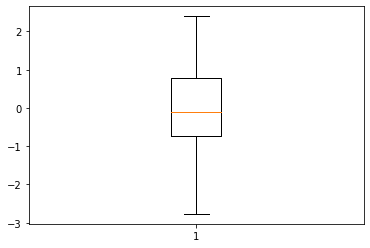

In [205]:
plt.boxplot(bp_df['bp_diff'])
plt.show()

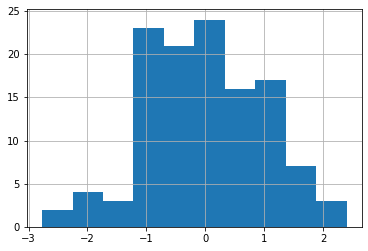

In [210]:
bp_df['bp_diff'].hist()
plt.show()

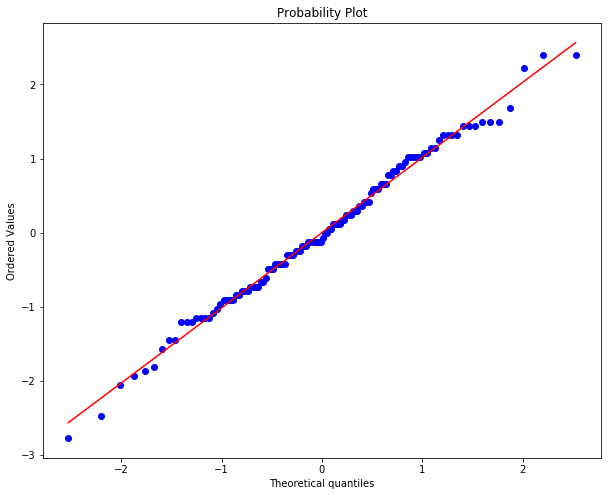

In [216]:
plt.subplots(figsize=(10,8))
stats.probplot(bp_df['bp_diff'],plot=plt)
plt.show()

In [217]:
stats.shapiro(bp_df['bp_diff'])

(0.992684006690979, 0.7841646671295166)

In [218]:
stats.ttest_ind(bp_df['bp_before'],bp_df['bp_after'])

Ttest_indResult(statistic=3.0669836819036274, pvalue=0.002412277478078891)

#### for Independent T-Test on paired sample we use ttest_rel

In [221]:
stats.ttest_rel(bp_df['bp_before'],bp_df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [227]:
rp.ttest(bp_df['bp_before'],bp_df['bp_after'],paired=True,equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_before =,156.450000
1,Mean for bp_after =,151.358333
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


## One-Way ANOVA

In [230]:
from scipy import stats
from statsmodels.formula.api import ols
bike_sharing_data_df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_cat
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [231]:
new_bike_sharing_data_df=bike_sharing_data_df.drop(columns=['temp_cat'])

In [232]:
new_bike_sharing_data_df.shape

(731, 7)

In [233]:
new_bike_sharing_data_df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [236]:
new_bike_sharing_data_df.groupby(by='weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


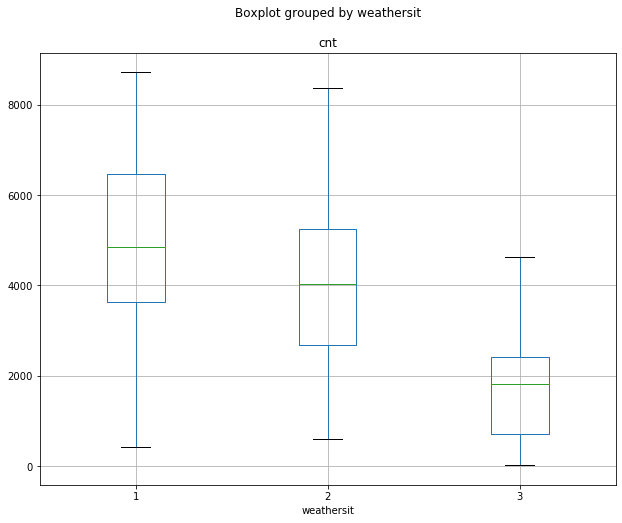

In [243]:
new_bike_sharing_data_df.boxplot(by='weathersit',column='cnt',figsize=(10,8))
plt.show()

###### One-Way ANOVA

In [247]:
stats.f_oneway(new_bike_sharing_data_df['cnt'][new_bike_sharing_data_df['weathersit']==1],
              new_bike_sharing_data_df['cnt'][new_bike_sharing_data_df['weathersit']==2],
              new_bike_sharing_data_df['cnt'][new_bike_sharing_data_df['weathersit']==3])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

#### One way ANOVA doesn't tell us how the groups are related, to find that we use Tukey's Honest Significance Difference method as below

In [249]:
from statsmodels.stats.multicomp import MultiComparison
mul_comp=MultiComparison(new_bike_sharing_data_df['cnt'],new_bike_sharing_data_df['weathersit'])
mul_result=mul_comp.tukeyhsd()
print(mul_result) 

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


## Two-way ANOVA

In [255]:
new_bike_sharing_data_df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [256]:
new_bike_sharing_data_df['weathersit'].unique()

array([2, 1, 3])

In [257]:
new_bike_sharing_data_df['season'].unique()

array([1, 2, 3, 4])

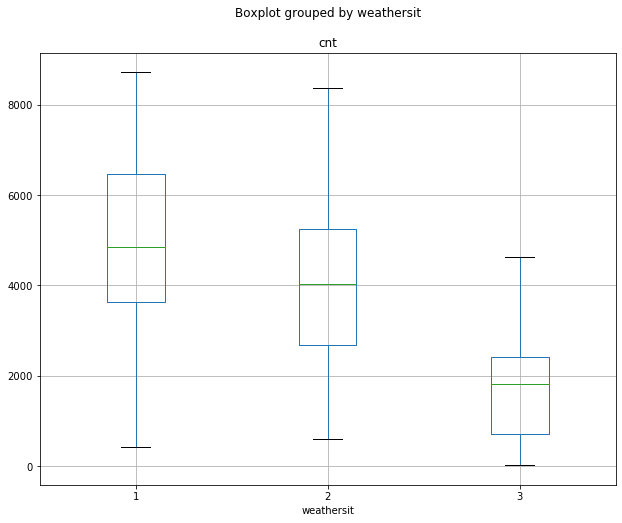

In [261]:
new_bike_sharing_data_df.boxplot(column='cnt',by='weathersit',figsize=(10,8))
plt.show()

In [262]:
rp.summary_cont(new_bike_sharing_data_df.groupby('weathersit'))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.786177,1879.483989,87.347028,4705.586001,5047.986353
2,247,4035.862348,1809.109918,115.110908,3810.244969,4261.479727
3,21,1803.285714,1240.284449,270.652256,1272.807293,2333.764136


In [263]:
rp.summary_cont(new_bike_sharing_data_df.groupby('season'))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.132597,1399.942119,104.056878,2400.181115,2808.084078
2,184,4992.331522,1695.977235,125.029101,4747.274485,5237.388559
3,188,5644.303191,1459.800381,106.466885,5435.628097,5852.978286
4,178,4728.162921,1699.615261,127.391550,4478.475484,4977.850359


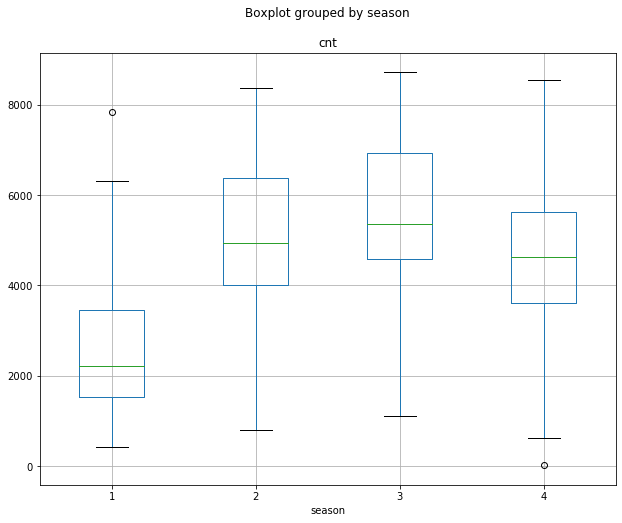

In [266]:
new_bike_sharing_data_df.boxplot('cnt',by='season',figsize=(10,8))
plt.show()

#### In order to perform 2 way ANOVA, we will first run regression analysis to check if there is linear relationship between weather situation and count of bikes

In [290]:
model1=ols('cnt ~ C(season)',new_bike_sharing_data_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           6.72e-67
Time:                        18:36:13   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [291]:
model2=ols('cnt ~ C(season) + C(weathersit)',new_bike_sharing_data_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           6.72e-67
Time:                        18:36:26   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [292]:
sm.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,9.505959e+08,3.168653e+08,148.649726,4.481108e-75
C(weathersit),2.0,2.435123e+08,1.217561e+08,57.118964,9.208258e-24
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


In [293]:
model3=ols('cnt ~ C(season) * C(weathersit)',new_bike_sharing_data_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 21 Dec 2019   Prob (F-statistic):           6.72e-67
Time:                        18:36:54   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [294]:
sm.stats.anova_lm(model3)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,9.505959e+08,3.168653e+08,150.402482,1.197593e-75
C(weathersit),2.0,2.435123e+08,1.217561e+08,57.792465,5.313463e-24
C(season):C(weathersit),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


## Chi2 analysis

In [296]:
from scipy.stats import chi2_contingency

In [297]:
ecom_df=pd.read_csv('02/demos/datasets/E-commerce.csv')

In [298]:
ecom_df.shape

(23472, 9)

In [299]:
ecom_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [300]:
ecom_df.columns=ecom_df.columns.str.lower()

In [301]:
ecom_df.columns=ecom_df.columns.str.replace(" ","_")

In [303]:
ecom_df.columns=ecom_df.columns.str.replace(":","")

In [304]:
ecom_df.columns

Index(['unnamed_0', 'clothing_id', 'age', 'rating', 'recommended_ind',
       'positive_feedback_count', 'division_name', 'department_name',
       'class_name'],
      dtype='object')

In [305]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23472 entries, 0 to 23471
Data columns (total 9 columns):
unnamed_0                  23472 non-null int64
clothing_id                23472 non-null int64
age                        23472 non-null int64
rating                     23472 non-null int64
recommended_ind            23472 non-null int64
positive_feedback_count    23472 non-null int64
division_name              23472 non-null object
department_name            23472 non-null object
class_name                 23472 non-null object
dtypes: int64(6), object(3)
memory usage: 1.6+ MB


In [306]:
ecom_df.sample(10)

,unnamed_0,clothing_id,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
13780,13783,974,28,4,1,6,General,Jackets,Jackets
8387,8387,1092,29,5,1,1,General,Dresses,Dresses
20009,20018,95,24,3,0,0,Initmates,Intimate,Intimates
5947,5947,850,38,4,1,1,General Petite,Tops,Blouses
3178,3178,909,46,4,1,0,General,Tops,Fine gauge
8215,8215,867,59,5,1,10,General Petite,Tops,Knits
9668,9669,828,30,2,1,0,General Petite,Tops,Blouses
20487,20497,936,55,5,1,0,General Petite,Tops,Sweaters
9224,9224,912,27,1,0,0,General,Tops,Fine gauge
16303,16310,1081,31,3,0,0,General Petite,Dresses,Dresses


In [309]:
ecom_df.drop(columns='unnamed_0',inplace=True)

In [310]:
ecom_df.sample(10)

,clothing_id,age,rating,recommended_ind,positive_feedback_count,division_name,department_name,class_name
6632,975,31,5,1,1,General Petite,Jackets,Jackets
6322,938,33,5,1,0,General Petite,Tops,Sweaters
6228,1056,44,4,1,17,General,Bottoms,Pants
10623,877,53,3,1,4,General,Tops,Knits
15327,1059,41,5,1,0,General Petite,Bottoms,Pants
9861,1056,63,5,1,0,General,Bottoms,Pants
286,868,42,2,0,1,General,Tops,Knits
4968,1110,82,5,1,1,General,Dresses,Dresses
11844,872,47,5,1,0,General Petite,Tops,Knits
9621,764,48,3,0,0,Initmates,Intimate,Lounge


In [312]:
e_comm_data=ecom_df[['rating','recommended_ind']]

In [313]:
e_comm_data.shape

(23472, 2)

In [314]:
e_comm_data.sample(10)

,rating,recommended_ind
8627,1,0
4992,5,1
4364,4,1
19384,4,1
19209,5,1
13248,5,1
4714,5,1
21440,4,1
4709,5,1
269,5,1


In [316]:
e_comm_data.reset_index(drop=True,inplace=True)

In [317]:
e_comm_data

,rating,recommended_ind
0,4,1
1,5,1
2,3,0
3,5,1
4,5,1
...,...,...
23467,5,1
23468,3,1
23469,3,0
23470,3,1


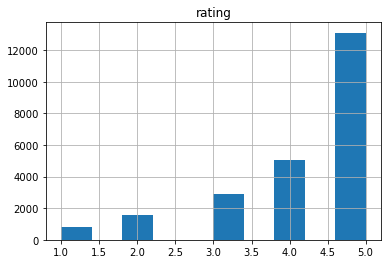

In [320]:
e_comm_data.hist('rating')
plt.show()

In [321]:
df_for_obs=pd.crosstab(e_comm_data['recommended_ind'],ecom_df['rating'])

In [322]:
df_for_obs

rating,1,2,3,4,5
recommended_ind,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


In [324]:
df_for_obs.values

array([[  826,  1471,  1682,   168,    25],
       [   16,    94,  1189,  4909, 13092]])

In [327]:
chi2,p_value,degree_of_freedom,expeted_values=chi2_contingency(df_for_obs)

In [330]:
print('chi2 value is :',round(chi2,3))

chi2 value is : 16711.664


In [334]:
print('P Value is :',p_value)

P Value is : 0.0


In [335]:
print('Degrees of freedom is:', degree_of_freedom)

Degrees of freedom is: 4


In [336]:
expeted_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [345]:
expeted_df=pd.DataFrame({
    '0':expeted_values[0],
    '1':expeted_values[1]
})

In [346]:
expeted_df.T

,0,1,2,3,4
0,149.660191,278.168882,510.302147,902.404738,2331.464042
1,692.339809,1286.831118,2360.697853,4174.595262,10785.535958


In [344]:
df_for_obs

rating,1,2,3,4,5
recommended_ind,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


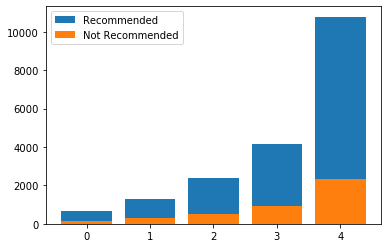

In [353]:
plt.bar(expeted_df.index,expeted_df['1'],label='Recommended')
plt.bar(expeted_df.index,expeted_df['0'],label='Not Recommended')
plt.legend()
plt.show()

In [355]:
ratings_recommended=e_comm_data[e_comm_data['recommended_ind']==1]
ratings_not_recommended=e_comm_data[e_comm_data['recommended_ind']==0]

In [357]:
ratings_not_recommended.shape,ratings_recommended.shape

((4172, 2), (19300, 2))

In [358]:
ratings_recommended.sample(10)

,rating,recommended_ind
2341,5,1
9807,5,1
19569,5,1
14981,4,1
16564,5,1
21599,4,1
5036,5,1
3433,4,1
20034,5,1
10889,5,1


In [359]:
ratings_not_recommended.sample(10)

,rating,recommended_ind
8330,3,0
2554,3,0
17076,3,0
12641,2,0
11826,3,0
14357,2,0
12959,2,0
2000,1,0
18796,2,0
22947,2,0


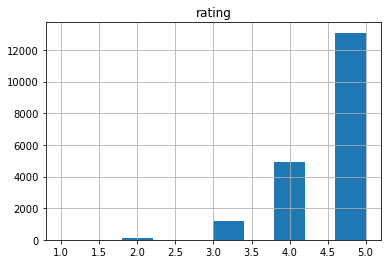

In [361]:
ratings_recommended.hist('rating')
plt.show()

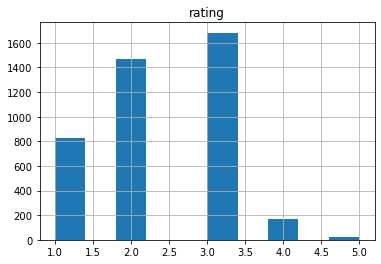

In [362]:
ratings_not_recommended.hist('rating')
plt.show()

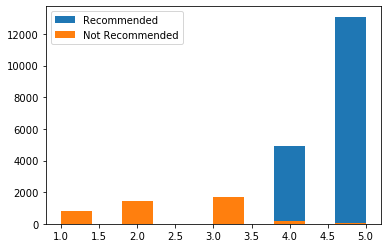

In [364]:
plt.hist(ratings_recommended['rating'],label='Recommended')
plt.hist(ratings_not_recommended['rating'],label='Not Recommended')
plt.legend()
plt.show()